# LiDAR ROI Mapping and Visualization

This notebook simulates LiDAR data and processes it to extract a Region of Interest (ROI) map showing:
- Point Density
- Maximum Height (Z)
- Average Intensity

Each output is visualized using `matplotlib` heatmaps.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic LiDAR data: [x, y, z, intensity]
np.random.seed(42)
num_points = 5000
lidar_points = np.zeros((num_points, 4))
lidar_points[:, 0] = np.random.uniform(0, 10, num_points)  # x
lidar_points[:, 1] = np.random.uniform(0, 10, num_points)  # y
lidar_points[:, 2] = np.random.uniform(0, 2, num_points)   # z (height)
lidar_points[:, 3] = np.random.uniform(0, 1, num_points)   # intensity

In [4]:
def lidar_points_on_roi(lidar_points, roi, resolution):
    x0, y0, width, length = roi
    num_pixels_l = int(np.ceil(length / resolution[0]))
    num_pixels_w = int(np.ceil(width / resolution[1]))

    output_image = np.zeros([num_pixels_l, num_pixels_w, 3])
    roi_points = lidar_points[
        (lidar_points[:, 0] >= x0) & (lidar_points[:, 0] < x0 + width) &
        (lidar_points[:, 1] >= y0) & (lidar_points[:, 1] < y0 + length)
    ]

    intensity_dict = {}
    for x, y, z, i in roi_points:
        px = int((x - x0) / resolution[0])
        py = int((y - y0) / resolution[1])

        output_image[py, px, 0] += 1  # density
        output_image[py, px, 1] = max(output_image[py, px, 1], z)  # max height

        if (py, px) not in intensity_dict:
            intensity_dict[(py, px)] = []
        intensity_dict[(py, px)].append(i)

    for (py, px), intensities in intensity_dict.items():
        output_image[py, px, 2] = np.mean(intensities)

    return output_image

In [5]:
# Set ROI and resolution
roi = (2, 2, 6, 6)
resolution = (0.1, 0.1)

output_image = lidar_points_on_roi(lidar_points, roi, resolution)

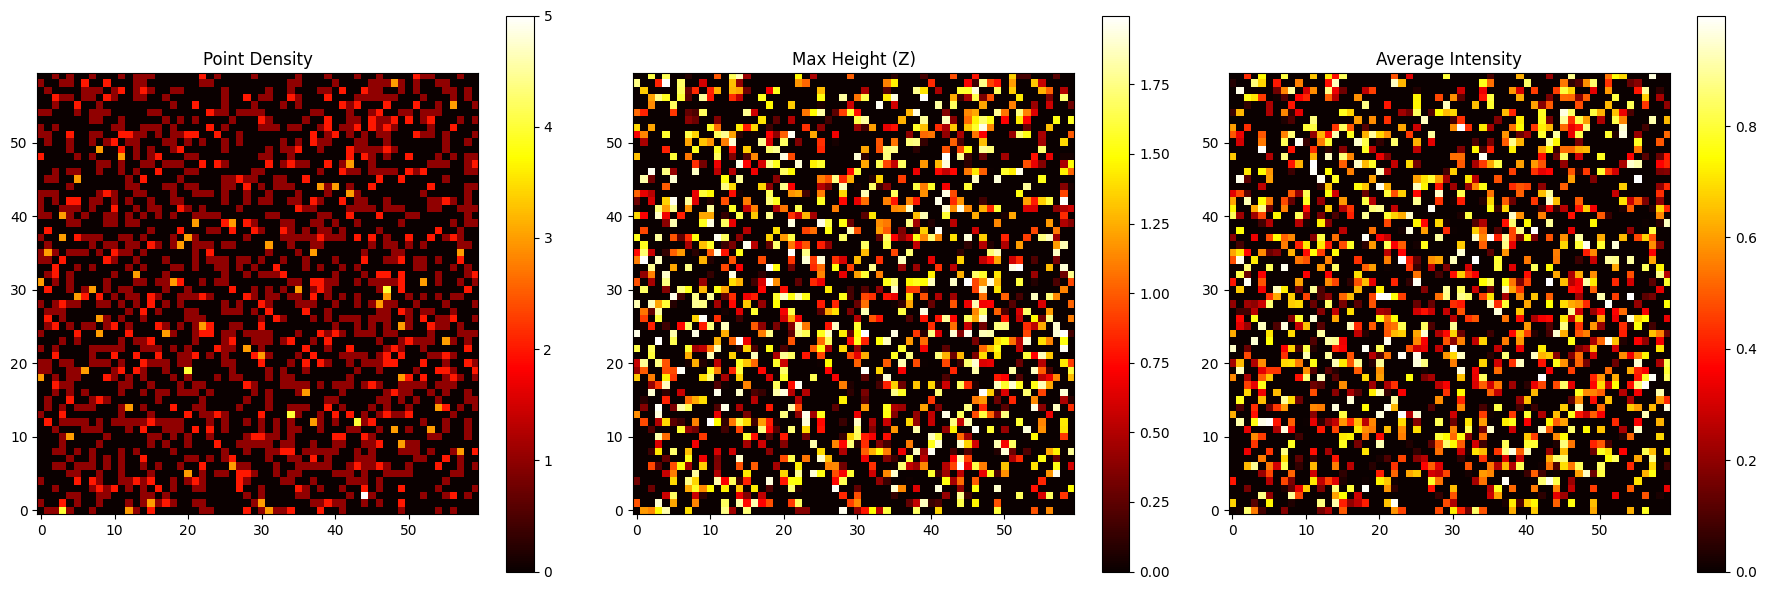

In [7]:
# Visualize the result
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Point Density', 'Max Height (Z)', 'Average Intensity']
for i in range(3):
    ax = axs[i]
    im = ax.imshow(output_image[:, :, i], cmap='hot', origin='lower')
    ax.set_title(titles[i])
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()